In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("C:\\Users\\shrad\\OneDrive\\Desktop\\JUP_NOTE\\Superstore.csv", encoding='latin1')
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [10]:
# Check shape and data types
print(df.shape)
print(df.dtypes)

(9994, 21)
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [13]:
# missing values
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [14]:
# Summary
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [15]:
# Postal Code to string
df['Postal Code'] = df['Postal Code'].astype('Int64').astype('str')

In [16]:
# Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [17]:
# Extract month and year for time series analysis
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Quarter'] = df['Order Date'].dt.quarter

In [18]:
# New column for total sales
df['Total Sales'] = df['Quantity'] * df['Sales']

C:\Users\shrad\AppData\Local\Temp\ipykernel_30052\51144664.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.groupby('Order Date')['Total Sales'].sum().resample('M').sum()


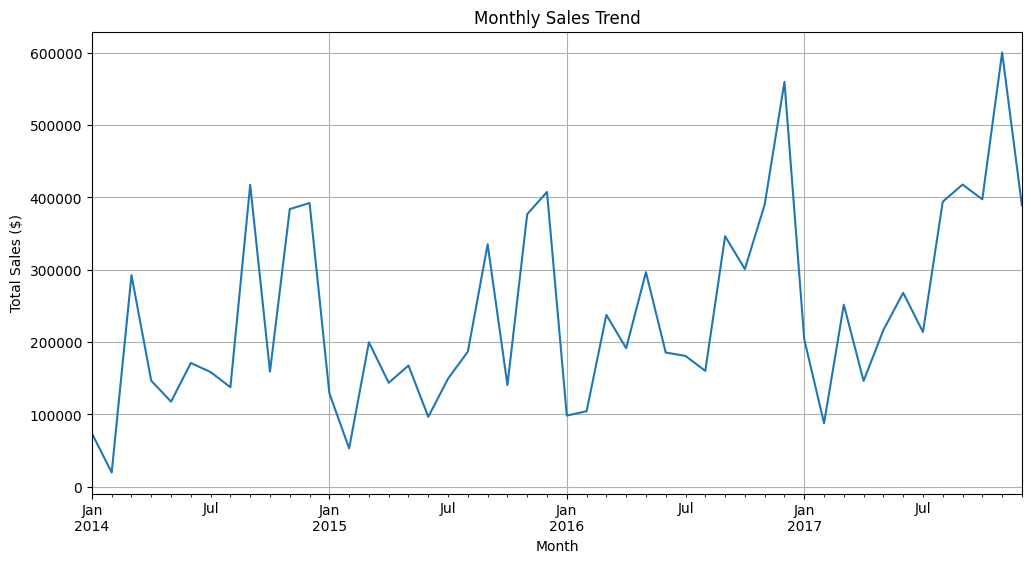

In [19]:
monthly_sales = df.groupby('Order Date')['Total Sales'].sum().resample('M').sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(title='Monthly Sales Trend')
plt.ylabel('Total Sales ($)')
plt.xlabel('Month')
plt.grid(True)
plt.show()

C:\Users\shrad\AppData\Local\Temp\ipykernel_30052\2580780821.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


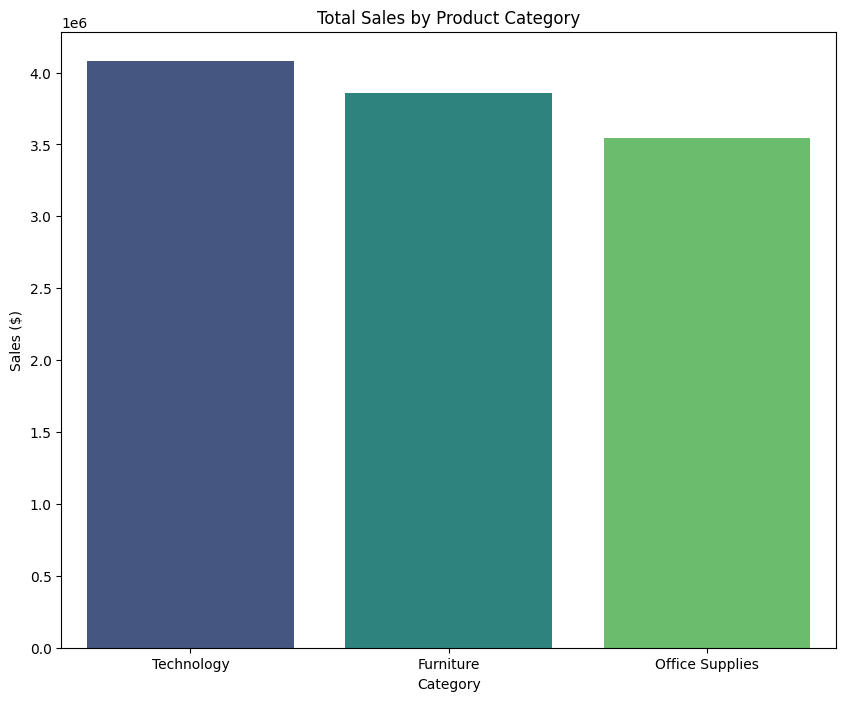

In [21]:
category_sales = df.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Sales by Product Category')
plt.ylabel('Sales ($)')
plt.xlabel('Category')
plt.show()

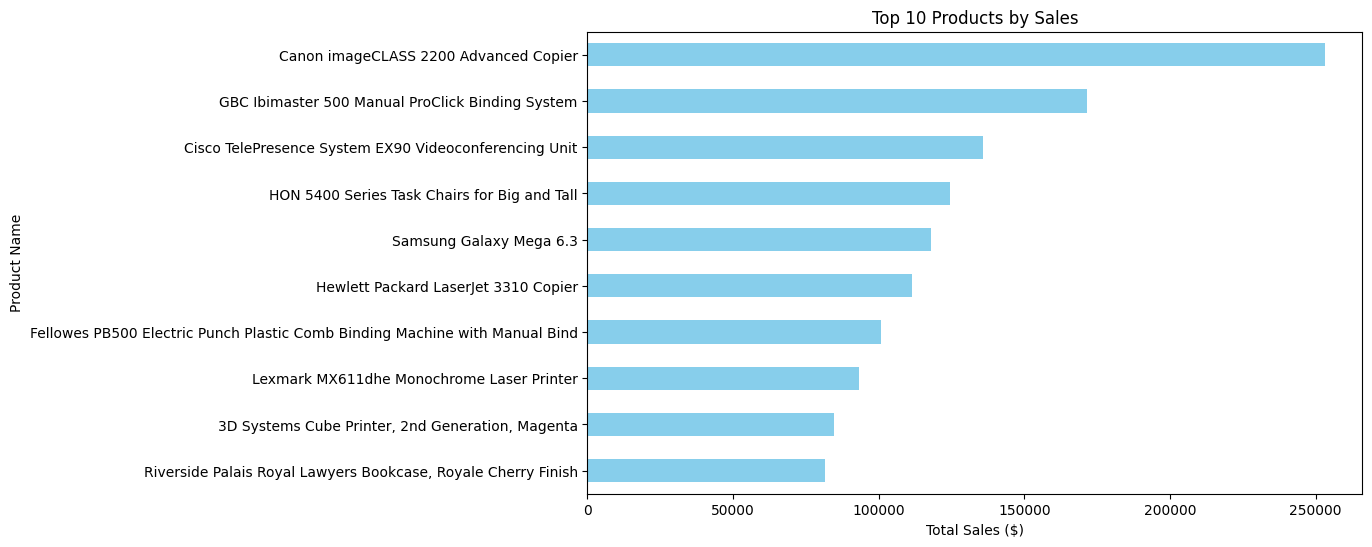

In [22]:
top_products = df.groupby('Product Name')['Total Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales ($)')
plt.gca().invert_yaxis()
plt.show()

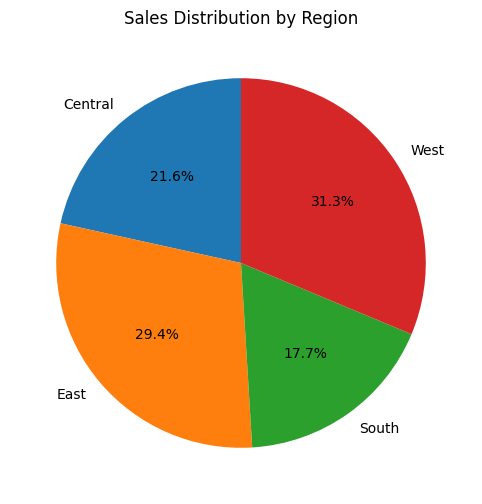

In [23]:
region_sales = df.groupby('Region')['Total Sales'].sum()

plt.figure(figsize=(8,6))
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()

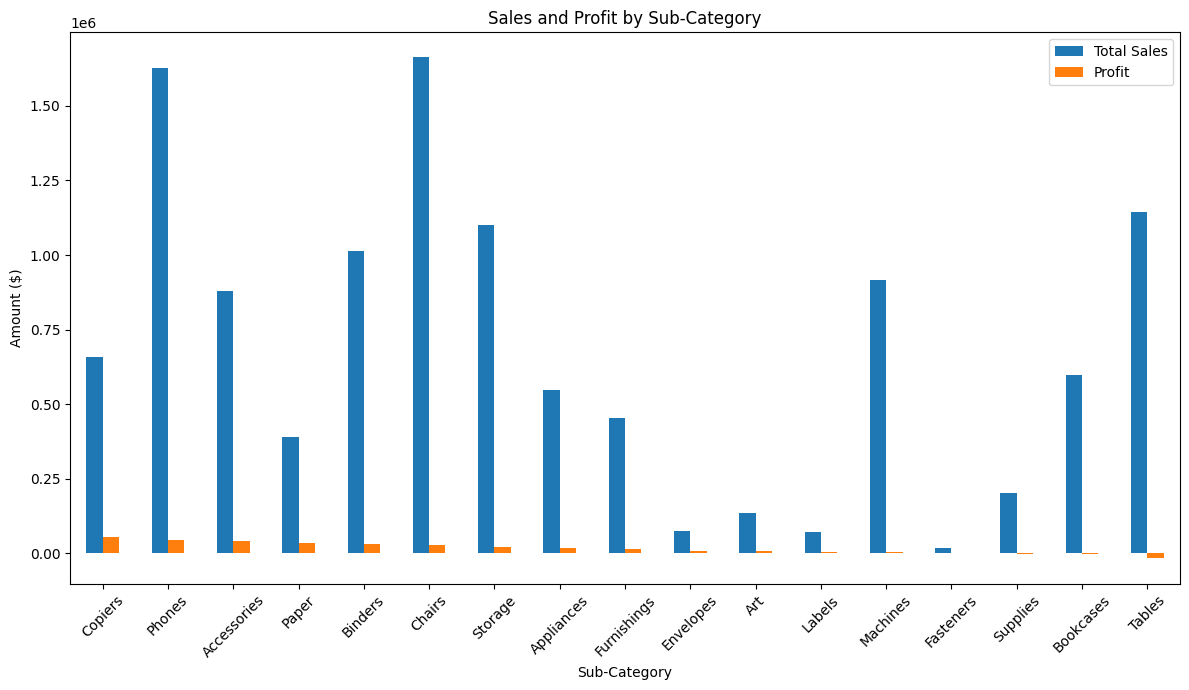

In [24]:
subcat_profit = df.groupby('Sub-Category').agg({'Total Sales': 'sum', 'Profit': 'sum'}).sort_values(by='Profit', ascending=False)

subcat_profit.plot(kind='bar', figsize=(12,7))
plt.title('Sales and Profit by Sub-Category')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.legend(['Total Sales', 'Profit'])
plt.tight_layout()
plt.show()

In [25]:
# Save cleaned data
df.to_csv('cleaned_superstore.csv', index=False)

# Save plot
plt.savefig('monthly_sales_trend.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>